**Brief on Neural Networks:**

Neural Networks are taliored very carefully for a specific use-case. We will look at hands-on example of one of the simplest model of Neural Network known as Multi-Layer Perceptron.

Multilayer Perceptrons are also known as Feed Forward Neural Networks. This model can be viewed as generalizations of linear models that perform multiple stages of processing to come to a decision. The value 'y' to be predicted is a weighted sum of the input features 'x' as in the case of a linear model. However, Neural Nets contains a lot more coeficients(also called as weigts here) in comparison to linear models.

Let us visualize a simple linear model...

In [1]:
import mglearn
# mglearn is a package specially designed for simple visualization of models.

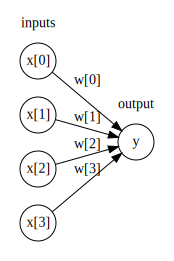

In [2]:
display(mglearn.plots.plot_logistic_regression_graph())

Here the input features are shown as nodes on the left ('x'), connecting lines are the weights ('w') (learned coefficients) and node on the right represents output ('y').

In Multilayer Perceptrons, the process of computing these wighted sums is repeated multiple times. There are "hidden units" that represents an intermediate processing steps which are later combined using the weighted sums to give the final result. 

Read detailed theory here: http://www.helsinki.fi/~ahonkela/dippa/node41.html

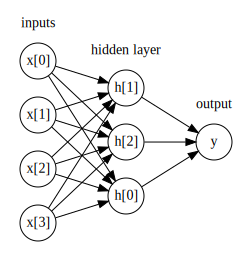

In [3]:
display(mglearn.plots.plot_single_hidden_layer_graph())

After computing a weighted sum for each hidden unit, to make the model more powerful than linear model, we apply a non-linear function such as **rectified linear unit ("relu")** or the **tangens hyperbolics ("tanh")**. The ***relu*** function cuts off values below zero and ***tanh*** saturates to -1 for low input values and +1 for high input values.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
line = np.linspace(-3, 3, 100)

Text(0,0.5,u'relu(x), tanh(x)')

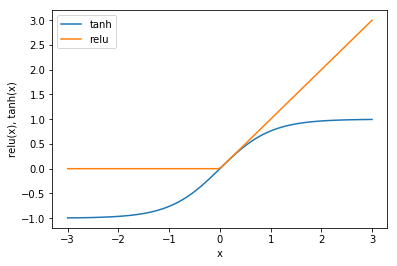

In [6]:
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

Let us have a look at a multilayer perceptron with two hidden layers...

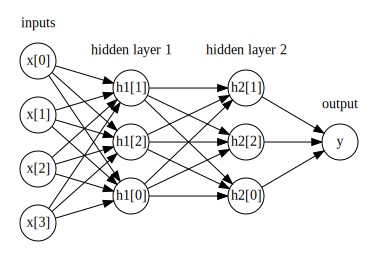

In [7]:
mglearn.plots.plot_two_hidden_layer_graph()

Let us now implement the MLP Classifier to the moons dataset.

In [8]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.neural_network import MLPClassifier

In [10]:
X,y = make_moons(n_samples=100, noise=0.25, random_state=3)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [12]:
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)

#explanation of solver='lbfgs' attribute is out of the scope of this exercise. I may discuss it in my next example.
#For explanation, check-out: http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

Text(0,0.5,u'Feature 1')

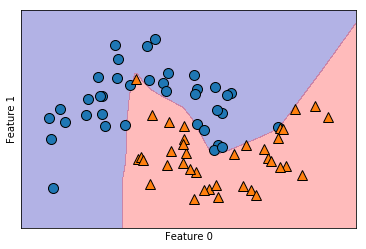

In [13]:
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1],y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

So this is the decision boundary learned by a neural network with 100 hidden units.

By default, the MLP uses 100 hidden nodes which is too much for this small dataset. Let us reduce this number. This reduces the complexity of the model.

In [14]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])

Text(0,0.5,u'Feature 1')

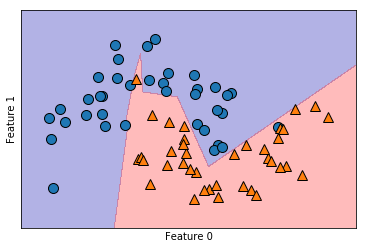

In [15]:
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

By default, the non-linearity is relu. Since we have used only single hidden layer with 100 hidden units, the decision boundary looks ragged. This is because the decision function will be made up of 10 straight lines. To get a smoother decision boundary, we can add up one more hidden layer.

In [16]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])

Text(0,0.5,u'Feature 1')

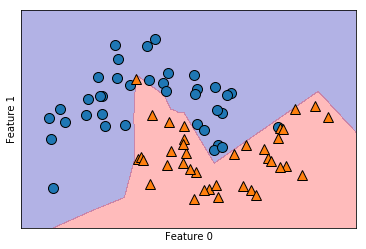

In [17]:
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [18]:
#This is the decision boundary using 2 hidden layers with 10 hidden units each, with the use of relu function.

In [19]:
mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0, hidden_layer_sizes=[10, 10])

Text(0,0.5,u'Feature 1')

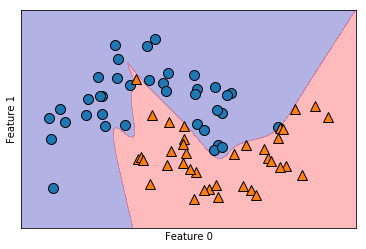

In [20]:
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [21]:
#This is the decision boundary learned using 2 hidden layers with 10 hidden units each, with tanh activation function.

We can control the complexity of our neural network by using "l2 regularization" which drifts the weights towards zero. The parameter is called alpha. It's set to very low, by default. We can check the effect of different values of alpha using two hidden layers of 10 or 100 units each.

Read more about the ***l2 regularization***: https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c?gi=485ab23bc55c

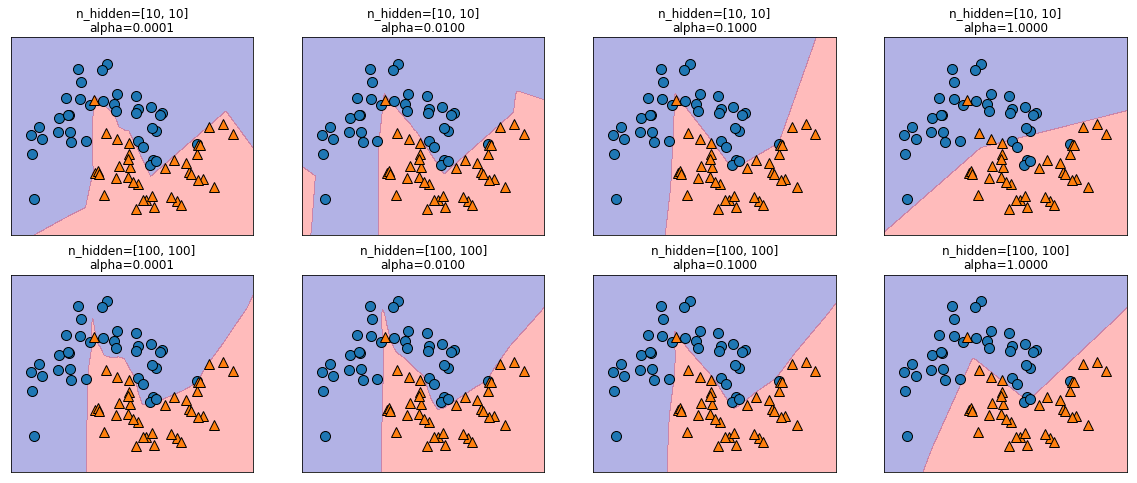

In [22]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8)) #for creating 2X4=8 boxes

for axx, n_hidden_nodes in zip(axes, [10, 100]): #two alternating values for no. of hidden units. (10 and 100)
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]): #five values for l2 regularization (alpha)
        
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

Therefore, 3 ways to control the complexity of Neural Networks:

1. The no. of hidden layers.
2. The no. of hidden units in each hidden layer.
3. The regularization factor alpha (here we used L2 regularization)

One of the crucial property of neural networks is that their weights are randomly set before learning process is started and this affects the model which is learned. So even when using exactly the same parameters, we may obtain very different models using different random seeds.

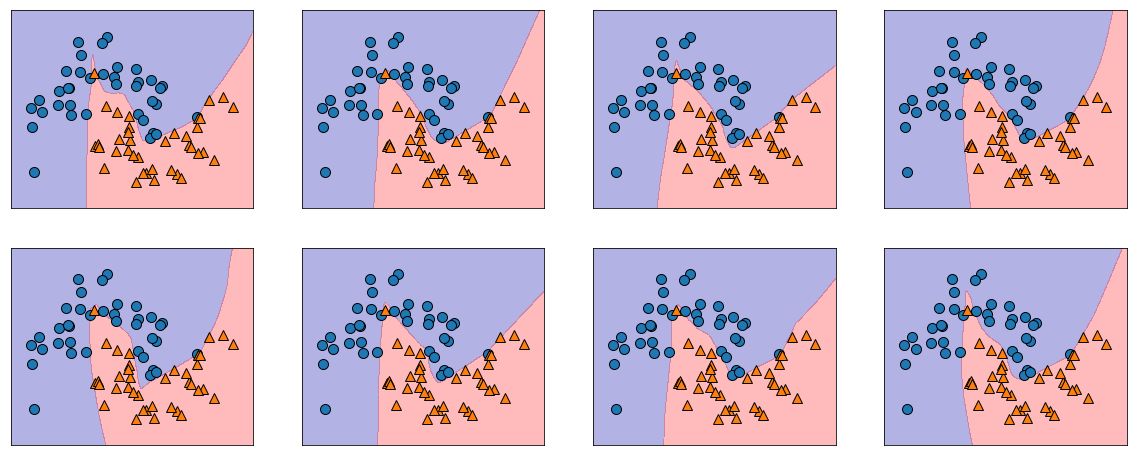

In [23]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

In the above plot, we have kept no. of hidden units constant and used different values for 'random_state'.

To get a better understanding on the real-world data, we will apply the MLP CLassifier to the Breast Cancer dataset.

In [26]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [27]:
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.91
Accuracy on test set: 0.88


Neural Networks expect the input features to vary in a similar way. They ideally have a mean of 0, and a variance of 1. We can look forward to rescale our data to make this possible. We will use "StandardScaler" for this.

In [29]:
# computing the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# computing the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)

# subtracting the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# using THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.965


/usr/local/lib/python2.7/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


We got better results after scaling our data. We got a warning from the model which tells us that max iterations have been reached and hence we should increase our number of iterations.

In [30]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.993
Accuracy on test set: 0.972


And, we get a better result!

Let us now finally analyze what the neural network has learned. We can do this by looking at the weights of the model. Below plot shows the weights that were learned connecting the input to the first hidden layer. The rows in this correspond to the 30 input features, while columns correspond to the 100 hidden units. Light color represents large positive value, while dark colors represents negative values.

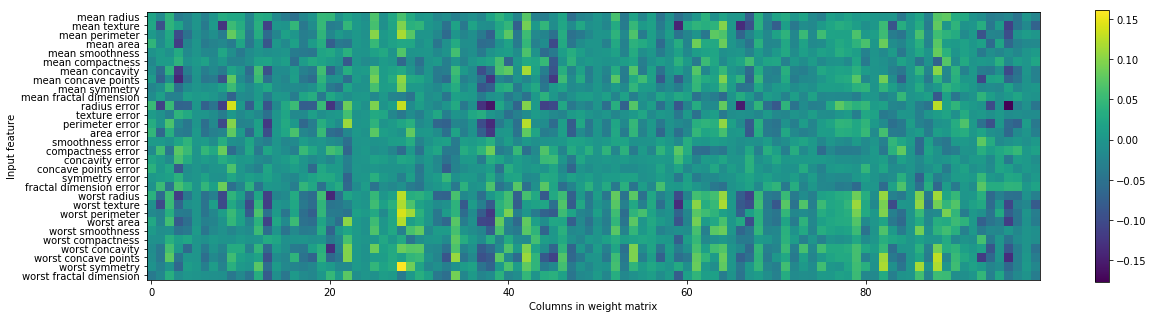

In [38]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

**Inference we can make from this is that features having small weights for all hidden units are less important to the model.**

Let's wrap it up by looking at strengths and weaknesses of the MLP Classifier/Regressor model:

***Strengths:***

1. Able to capture information contained in large amounts of data and build incredibly complex models.
2. If we give enough computation time, data and careful tuning of parameters, neural networks will often beat other machine learning algorithms, especially for classification and regression tasks.

***Weaknesses:***

1. Large and Powerful neural networks usually take a long time to train.
2. As we saw, they require very careful pre-processing of data.
3. Neural networks works best if it has features with similar meanings (like SVM's) - homogenous data. They might not work very well in case of data with differnt kinds of features and we may need to consider tree-based models in that case.

**Complexity of the model:**
    
A common way is to adjust parameters in a neural network is to first create a network that is large enough to overfit which makes sure that the tasks can be actually learned by the network. After then, once we know the training data can be learned, we can either shrink the network or increase **alpha** to add regualarization which will improve generaization performance.